In [ ]:
  import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data=pd.read_csv('/content/Boston housing dataset.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.shape

(506, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.nunique()

,0
CRIM,484
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,348
DIS,412
RAD,9
TAX,66


In [ ]:
data.CHAS.unique()

array([ 0., nan,  1.])

In [ ]:
data.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,   nan,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,
        22. ,  20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [ ]:
data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
df=data.copy()

In [ ]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(),inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0],inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].median(),inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [ ]:
df['CHAS']=df['CHAS'].astype('int')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.845850,27.486962,2.90000,45.925000,76.80000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


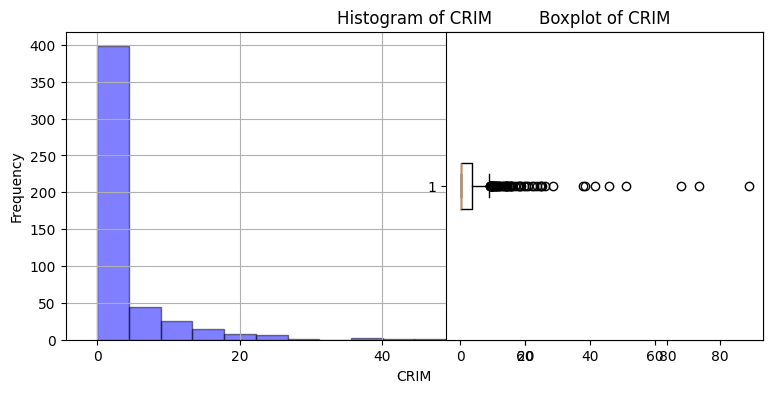

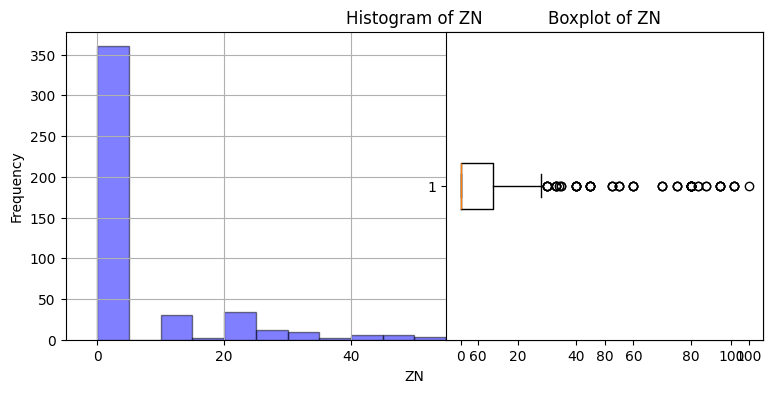

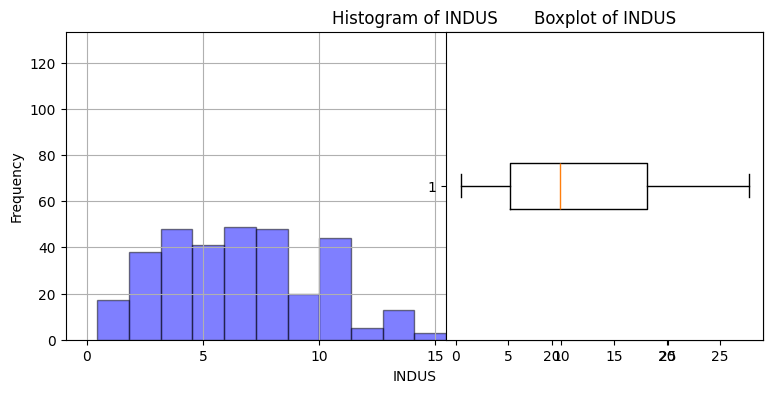

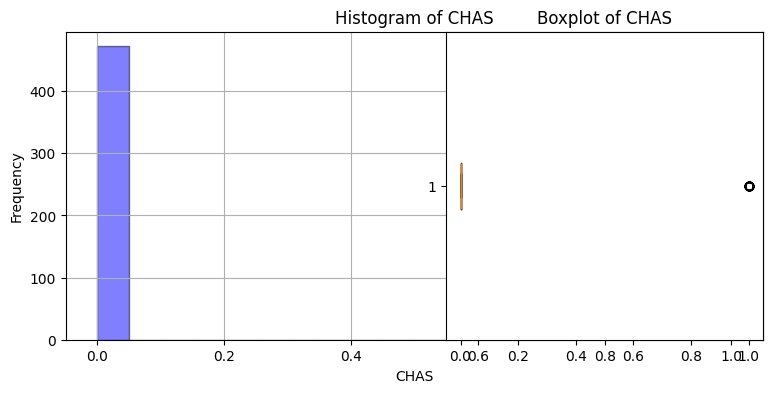

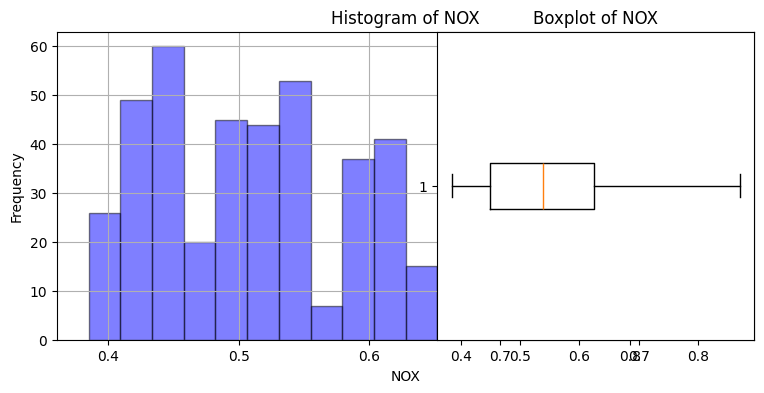

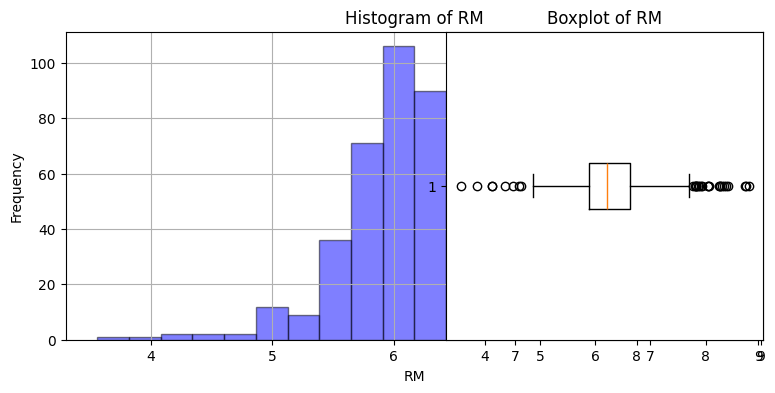

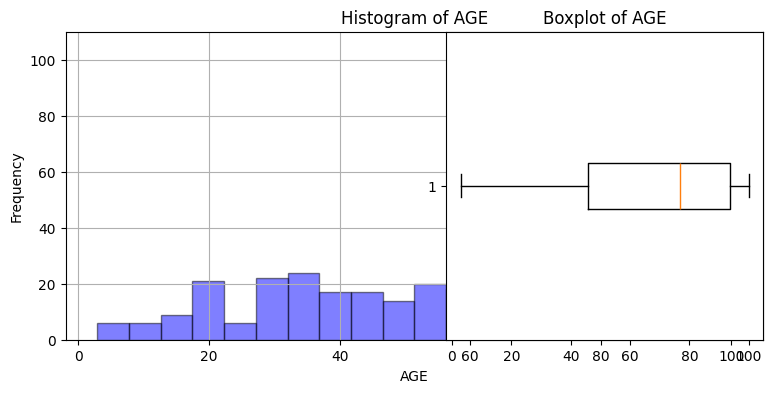

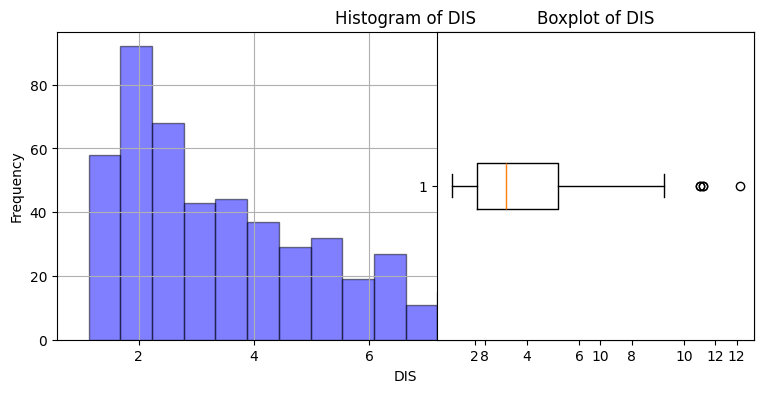

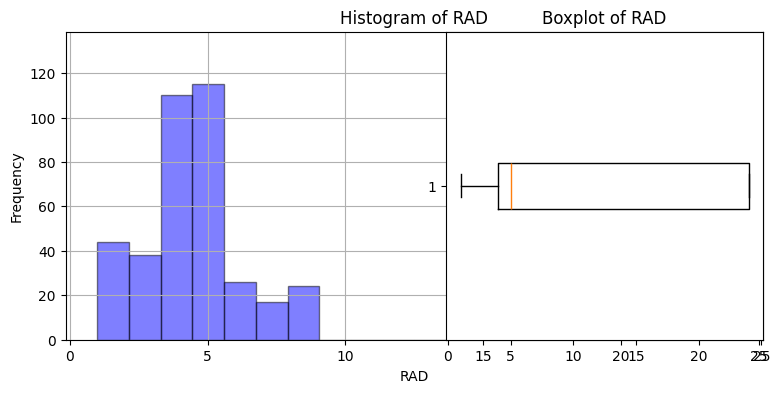

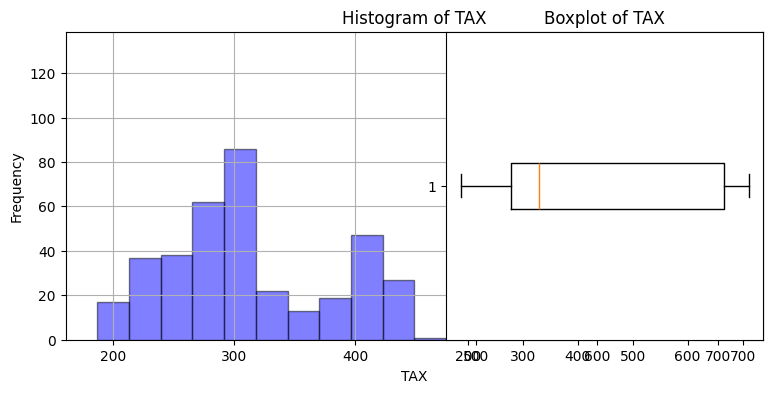

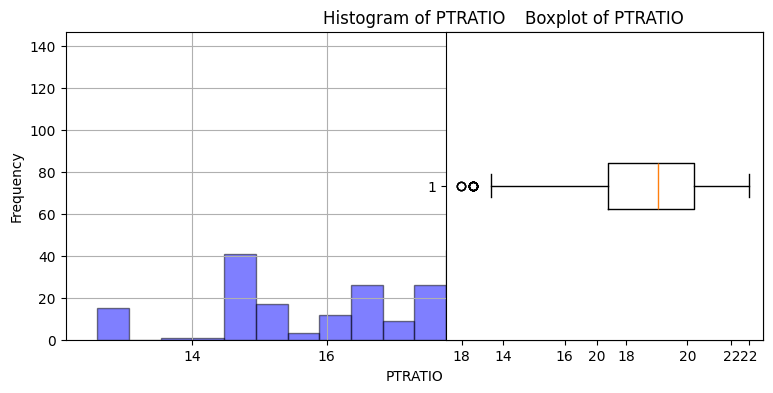

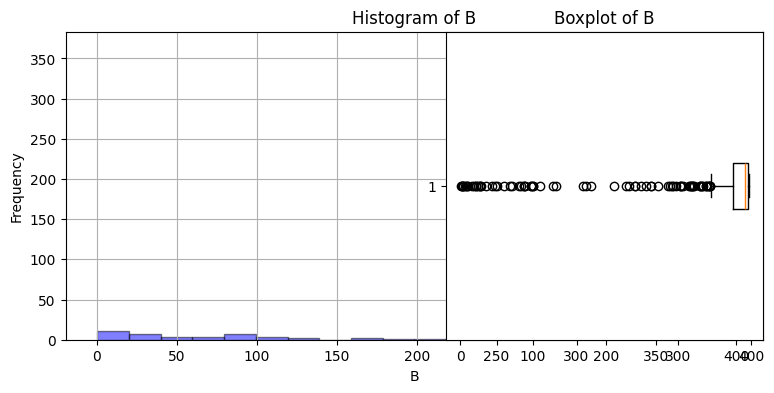

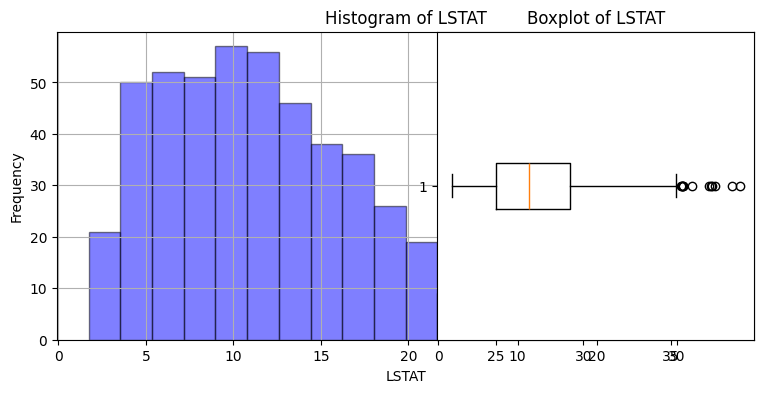

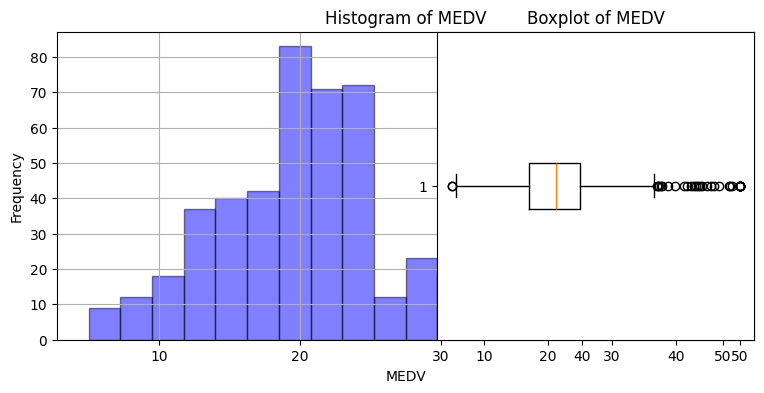

In [ ]:
for i in df.columns:
  plt.figure(figsize=(9,4))
  df[i].hist(bins=20,alpha=0.5,color='b',edgecolor='black')
  plt.title(f'Histogram of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.subplot(1,2,2)
  plt.boxplot(df[i],vert=False)
  plt.title(f'Boxplot of {i}')
  plt.show()

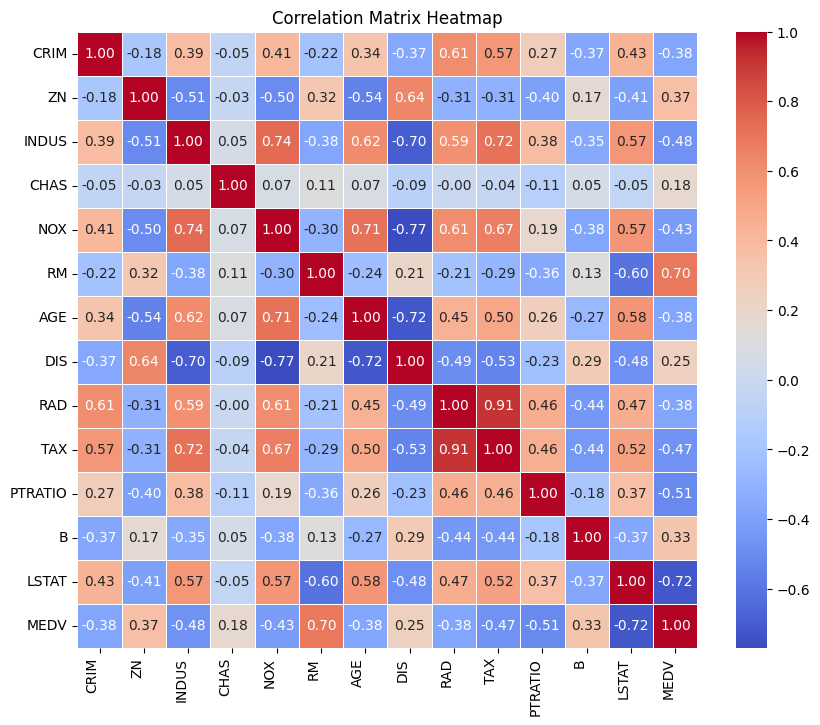

In [ ]:
corr=df.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.xticks(rotation=90,ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [ ]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([28.99719439, 36.56606809, 14.51022803, 25.02572187, 18.42885474,
       23.02785726, 17.95437605, 14.5769479 , 22.14430832, 20.84584632,
       25.15283588, 18.55925182, -5.69168071, 21.71242445, 19.06845707,
       25.94275348, 19.70991322,  5.85916505, 40.9608103 , 17.21528576,
       25.36124981, 30.26007975, 11.78589412, 23.48106943, 17.35338161,
       15.13896898, 21.61919056, 14.51459386, 23.17246824, 19.40914754,
       22.56164985, 25.21208496, 25.88782605, 16.68297496, 16.44747174,
       16.65894826, 31.10314158, 20.25199803, 24.38567686, 23.09800032,
       14.47721796, 32.36053979, 43.01157914, 17.61473728, 27.60723089,
       16.43366912, 14.25719607, 26.0854729 , 19.75853278, 30.15142187,
       21.01932313, 33.72128781, 16.39180467, 26.36438908, 39.75793372,
       22.02419633, 18.39453126, 32.81854401, 25.370573  , 12.82224665,
       22.76128341, 30.73955199, 31.34386371, 16.27681305, 20.36945226,
       17.23156773, 20.15406451, 26.15613066, 30.92791361, 11.42

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.944071172175573
Root Mean Squared Error: 4.99440398567993
R-squared: 0.6598556613717497


In [ ]:
### 7 B


In [ ]:
#7B

In [ ]:
#same libraries

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
data=sns.load_dataset('mpg')

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.shape

(398, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


In [ ]:
data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
df=data.copy()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [ ]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [ ]:
numerical=df.select_dtypes(include=['int64','float64']).columns
categorical=df.select_dtypes(include=['object']).columns
print(numerical)
print(categorical)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')
Index(['origin', 'name'], dtype='object')


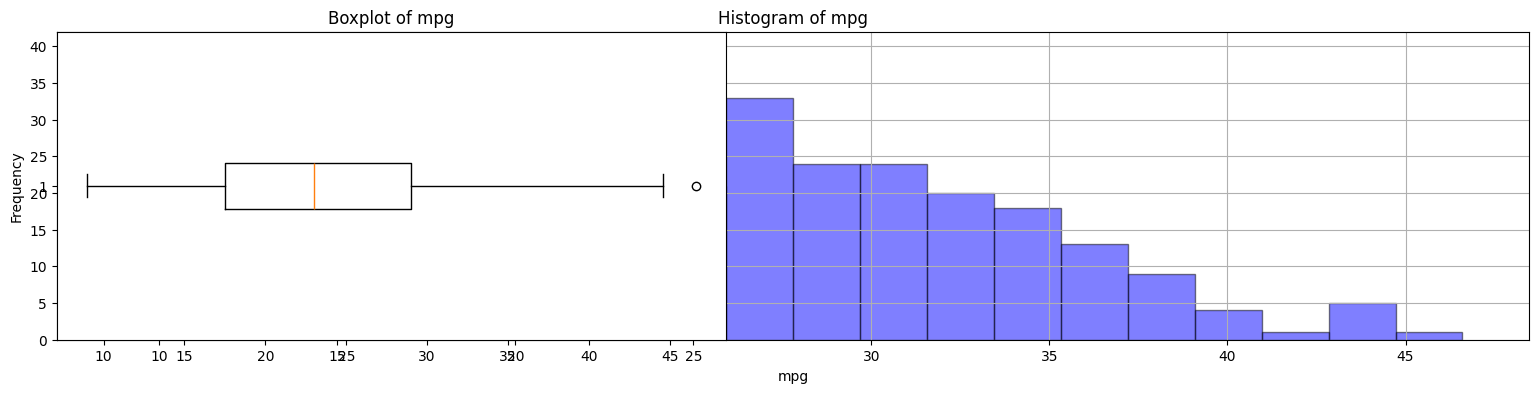

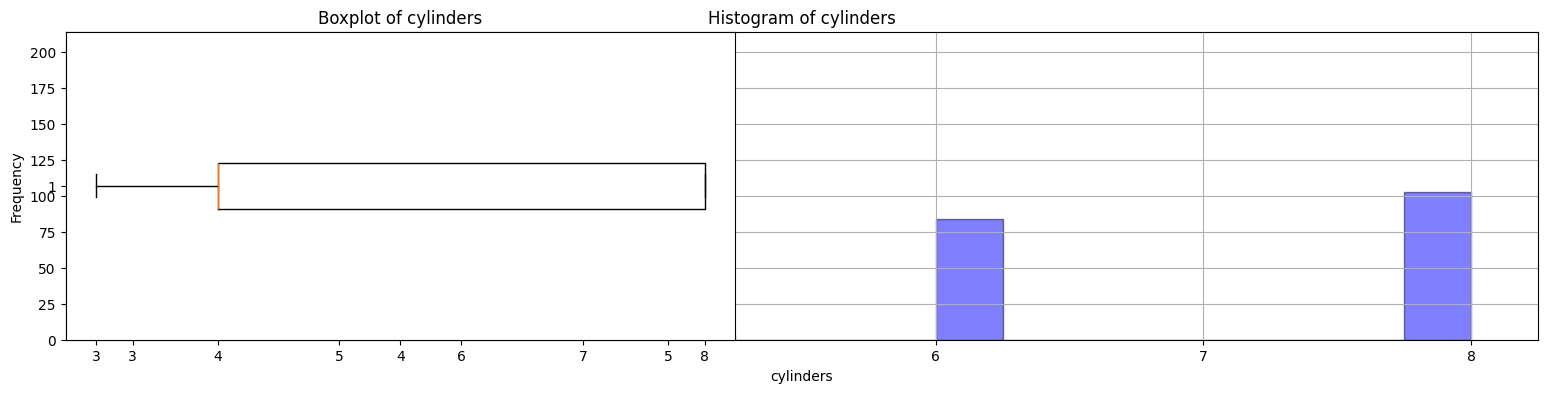

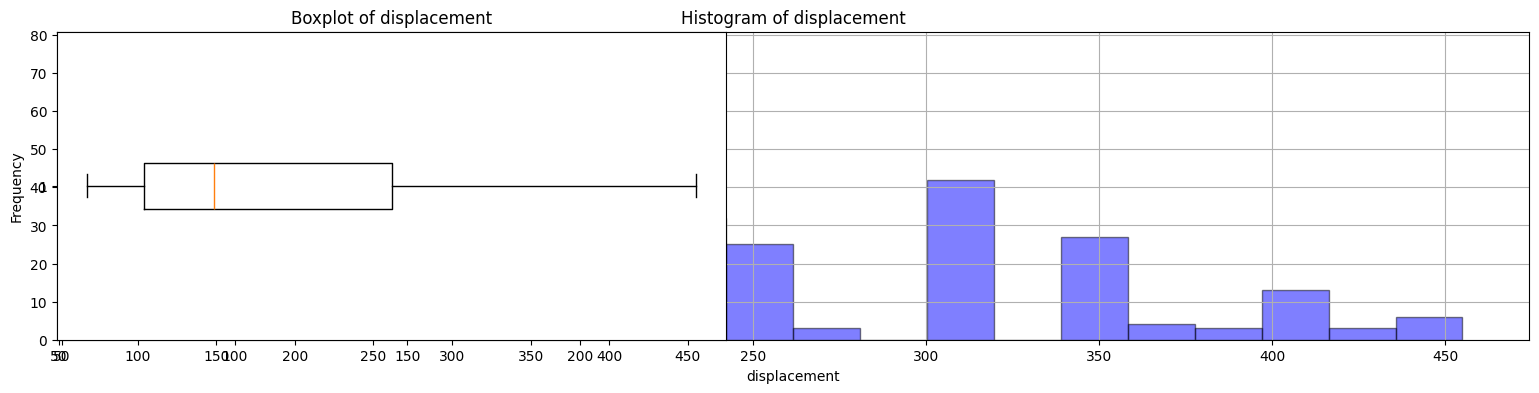

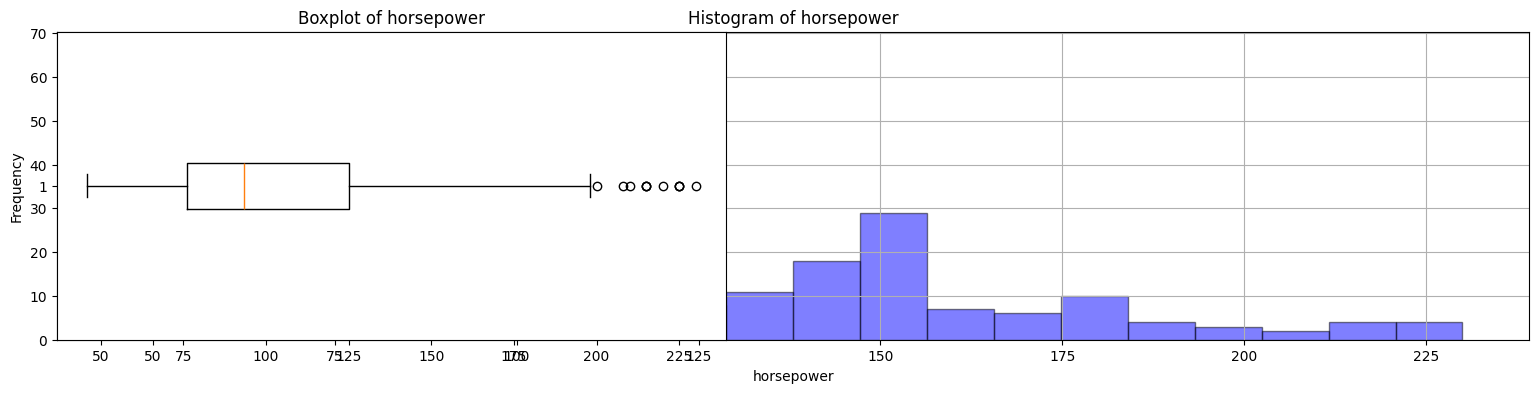

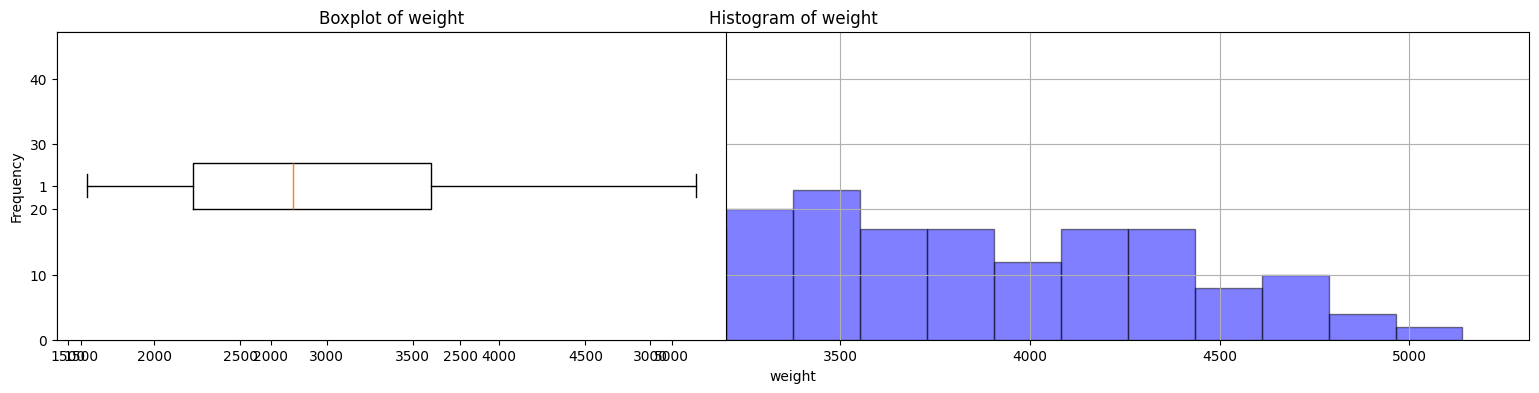

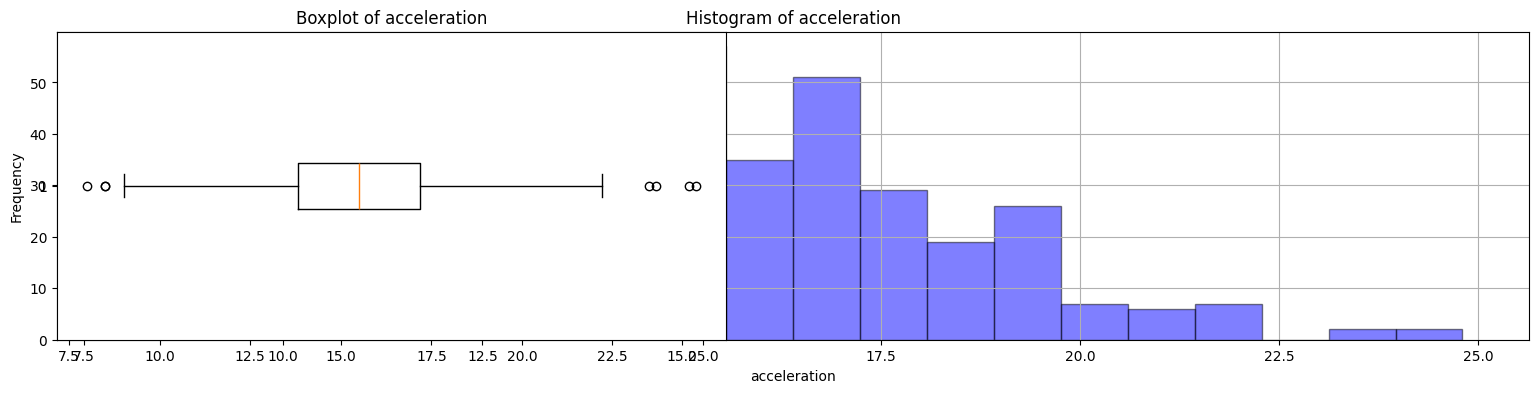

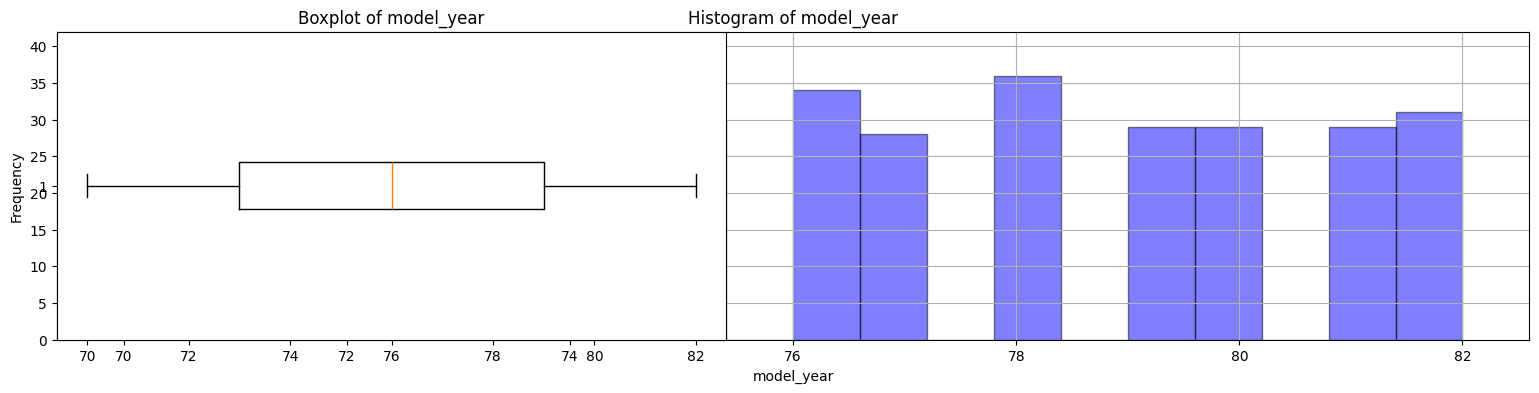

In [ ]:
for i in numerical:
  plt.figure(figsize=(19,4))
  df[i].hist(bins=20,alpha=0.5,color='b',edgecolor='black')
  plt.title(f'Histogram of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.subplot(1,2,1)
  plt.boxplot(df[i],vert=False)
  plt.title(f'Boxplot of {i}')
  plt.show()

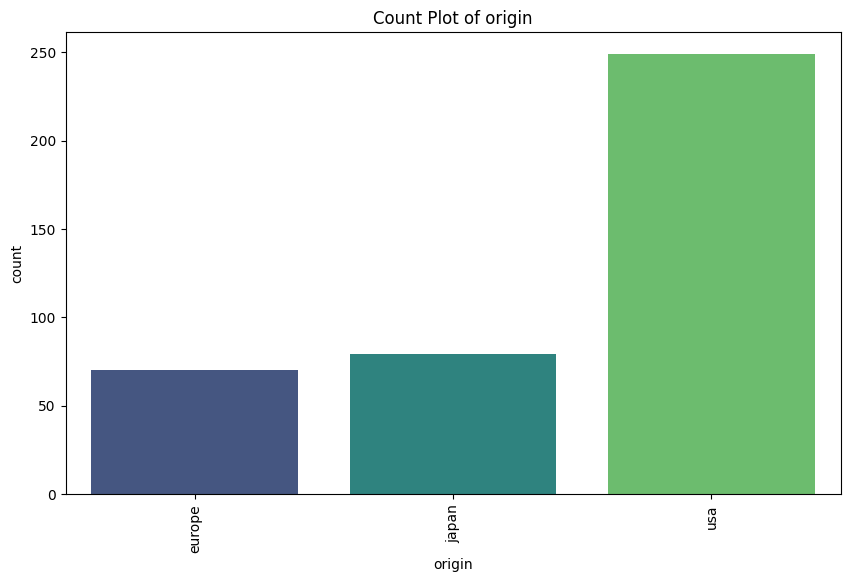

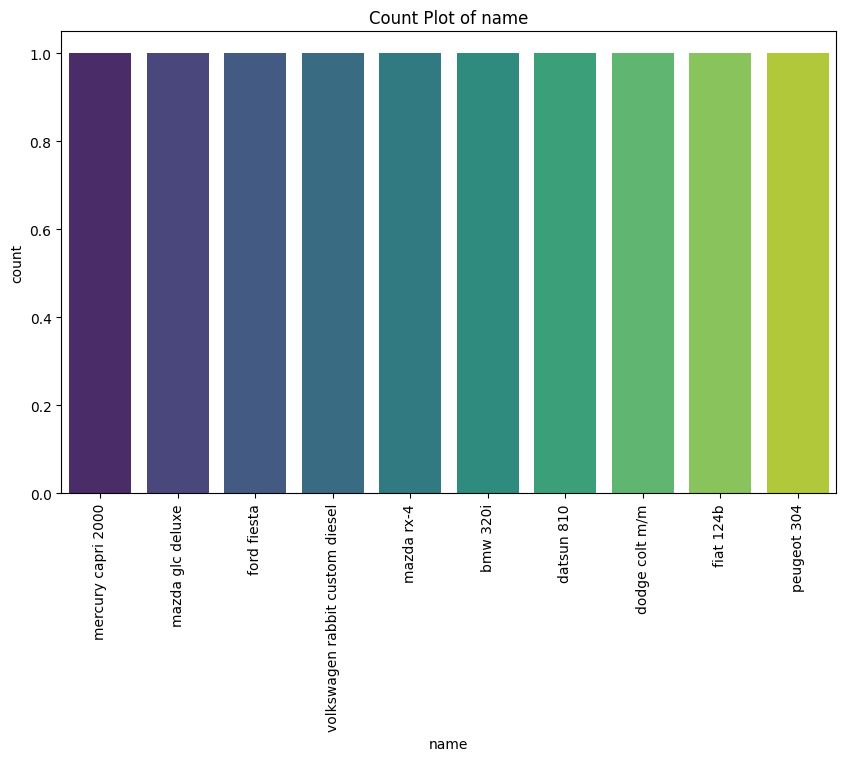

In [ ]:
import seaborn as sns
for col in categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col,data=df, order=df[col].value_counts().sort_values().head(10).index, palette='viridis')

    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

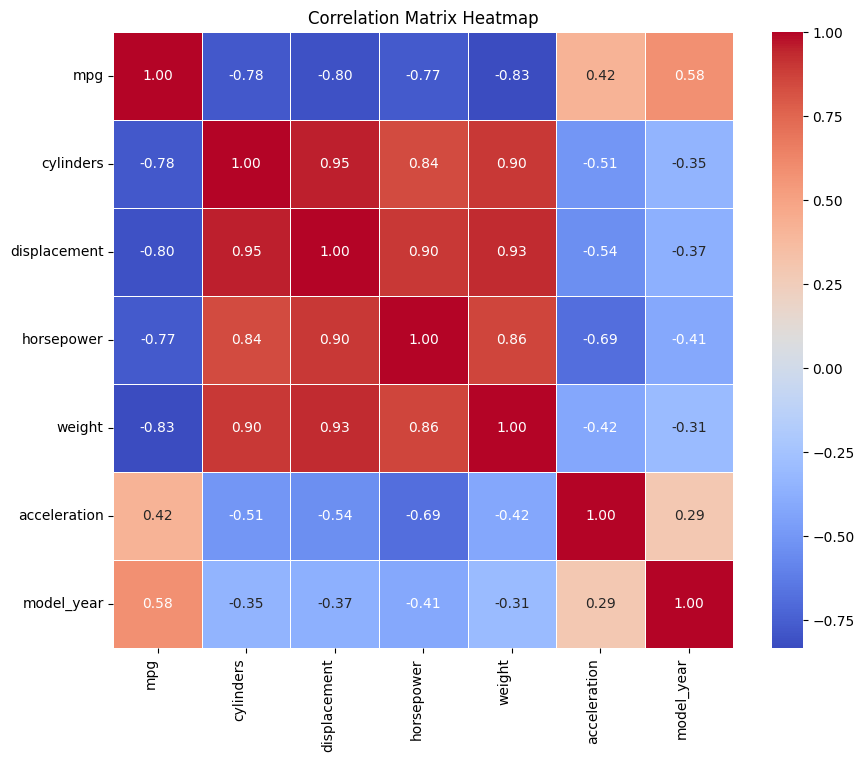

In [ ]:
corr_data=df[numerical].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_data,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.xticks(rotation=90,ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X=df[['horsepower']]
y=df['mpg']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.isna().sum())


horsepower    0
dtype: int64


In [ ]:
degree=2
poly=PolynomialFeatures(degree)
X_poly_train=poly.fit_transform(X_train)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_poly_train,y_train)

LinearRegression()

In [ ]:
X_poly_test=poly.transform(X_test)
y_pred=model.predict(X_poly_test)

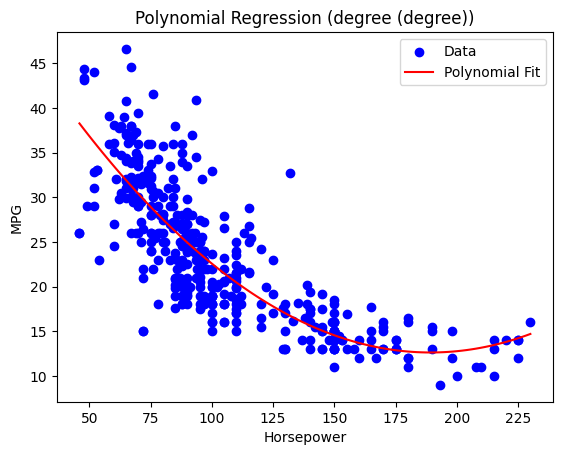

In [ ]:
plt.scatter (X, y, color='blue', label='Data')
X_range=np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly=poly.transform(X_range)
y_range_pred=model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title(f'Polynomial Regression (degree (degree))')
plt.show()

In [ ]:
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
#Print the evaluation metrics


In [ ]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 13.94
Root Mean Squared Error (RMSE): 3.73
R-squared (R2): 0.74
